In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# EDA

In [0]:
df_train = pd.read_csv('../data/happiness_train_complete.csv', encoding='gbk', parse_dates=['survey_time'])
df_test = pd.read_csv('../data/happiness_test_complete.csv', encoding='gbk', parse_dates=['survey_time'])

In [0]:
print(df_train.shape)
print(df_test.shape)

(8000, 141)
(2968, 140)


 4    4818
 5    1410
 3    1159
 2     497
 1     104
-8      12
Name: happiness, dtype: int64


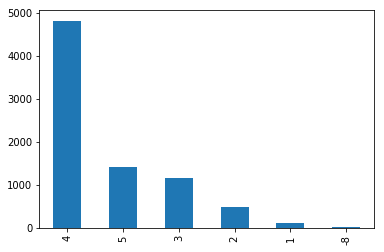

In [0]:
print(df_train['happiness'].value_counts())
df_train['happiness'].value_counts().plot(kind='bar')

In [0]:
for col in df_train.columns:
    print(col, df_train[col].dtypes)

id int64
happiness int64
survey_type int64
province int64
city int64
county int64
survey_time datetime64[ns]
gender int64
birth int64
nationality int64
religion int64
religion_freq int64
edu int64
edu_other object
edu_status float64
edu_yr float64
income int64
political int64
join_party float64
floor_area float64
property_0 int64
property_1 int64
property_2 int64
property_3 int64
property_4 int64
property_5 int64
property_6 int64
property_7 int64
property_8 int64
property_other object
height_cm int64
weight_jin int64
health int64
health_problem int64
depression int64
hukou int64
hukou_loc float64
media_1 int64
media_2 int64
media_3 int64
media_4 int64
media_5 int64
media_6 int64
leisure_1 int64
leisure_2 int64
leisure_3 int64
leisure_4 int64
leisure_5 int64
leisure_6 int64
leisure_7 int64
leisure_8 int64
leisure_9 int64
leisure_10 int64
leisure_11 int64
leisure_12 int64
socialize int64
relax int64
learn int64
social_neighbor float64
social_friend float64
socia_outing int64
equity int64

In [0]:
df_train.describe()

,id,happiness,survey_type,province,city,county,gender,birth,nationality,religion,religion_freq,edu,edu_status,edu_yr,income,political,join_party,floor_area,property_0,property_1,property_2,property_3,property_4,property_5,property_6,property_7,property_8,height_cm,weight_jin,health,health_problem,depression,hukou,hukou_loc,media_1,media_2,media_3,media_4,media_5,media_6,...,s_income,s_work_exper,s_work_status,s_work_type,f_birth,f_edu,f_political,f_work_14,m_birth,m_edu,m_political,m_work_14,status_peer,status_3_before,view,inc_ability,inc_exp,trust_1,trust_2,trust_3,trust_4,trust_5,trust_6,trust_7,trust_8,trust_9,trust_10,trust_11,trust_12,trust_13,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,6880.000000,6028.000000,8.000000e+03,8000.000000,824.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,7996.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,...,6.282000e+03,6282.000000,2565.000000,2565.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000
mean,4000.50000,3.850125,1.405500,15.155375,42.564750,70.619000,1.53000,1964.707625,1.37350,0.772250,1.427250,4.878375,3.505523,1574.742867,3.330734e+04,1.317750,1785.067961,115.302954,0.007875,0.473000,0.268500,0.101125,0.102750,0.023625,0.004000,0.022500,0.13600,163.989750,121.575625,3.598500,3.786250,3.819375,1.893750,1.375938,1.891875,1.710125,1.797375,3.915375,2.368625,1.60575,...,2.836550e+04,2.838427,3.175828,0.963743,1108.42025,2.043500,1.079125,2.744625,1150.667250,1.550500,0.89900,4.027500,2.226125,1.702500,3.30350,1.094875,2.337343e+05,3.784875,3.173500,2.136750,1.959000,4.173250,2.020375,2.622375,2.228375,2.502750,0.668250,-2.444750,-0.177875,1.759375,3.722250,70.809500,68.170000,62.737625,66.320125,62.794187,67.064000,66.09625,65.626750,67.153750
std,2309.54541,0.938228,0.491019,8.917100,27.187404,38.747503,0.49913,16.842865,1.52882,1.071459,1.408441,3.154533,1.115498,807.475327,2.329853e+05,1.141358,602.719540,87.275890,0.088397,0.499302,0.443207,0.301513,0.303651,0.151887,0.063123,0.148312,0.34281,8.086567,23.189453,1.108468,1.372332,1.062846,1.348588,0.676408,1.135163,0.971965,1.109041,1.070564,1.702382,1.18943,...,1.693632e+05,1.732786,1.769002,1.213167,962.43536,3.721873,1.733707,4.214010,956.602196,3.079673,1.31739,5.518247,0.971525,0.976147,1.98132,3.410180,2.975868e+06,1.484797,2.126726,3.983627,3.942843,1.228179,4.185588,2.036061,3.974474,2.782573,4.735662,5.566805,5.252707,1.681986,1.143358,21.184742,20.549943,24.771319,22.049437,23.463162,21.586817,23.08568,23.827493,22.502203
min,1.00000,-8.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1921.000000,-8.00000,-8.000000,-8.000000,-8.000000,-8.000000,-3.000000,-3.000000e+00,-8.000000,-3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,114.000000,40.000000,-8.000000,-8.000000,-8.000000,1.000000,1.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,...,-3.000000e+00,1.000000,-8.000000,-8.000000,-3.00000,-8.000000,-8.000000,-8.000000,-3.000000,-8.000000,-8.00000,-8.000000,-8.000000,-8.000000,-8.00000,-8.000000,-3.000000e+00,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.

In [0]:
df_train.head()

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,religion,religion_freq,edu,edu_other,edu_status,edu_yr,income,political,join_party,floor_area,property_0,property_1,property_2,property_3,property_4,property_5,property_6,property_7,property_8,property_other,height_cm,weight_jin,health,health_problem,depression,hukou,hukou_loc,media_1,media_2,media_3,...,s_income,s_work_exper,s_work_status,s_work_type,f_birth,f_edu,f_political,f_work_14,m_birth,m_edu,m_political,m_work_14,status_peer,status_3_before,view,inc_ability,inc_exp,trust_1,trust_2,trust_3,trust_4,trust_5,trust_6,trust_7,trust_8,trust_9,trust_10,trust_11,trust_12,trust_13,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
0,1,4,1,12,32,59,2015-08-04 14:18:00,1,1959,1,1,1,11,NaN,4.0,-2.0,20000,1,NaN,45.0,0,1,0,0,0,0,0,0,0,NaN,176,155,3,2,5,5,2.0,4,2,5,...,40000.0,5.0,NaN,NaN,-2,4,4,1,-2,4,1,1,3,2,4,3,50000.0,4,2,-8,-8,5,3,2,3,4,3,-8,4,1,4,50,60,50,50,30.0,30,50,50,50
1,2,4,2,18,52,85,2015-07-21 15:04:00,1,1992,1,1,1,12,NaN,4.0,2013.0,20000,1,NaN,110.0,0,0,0,0,1,0,0,0,0,NaN,170,110,5,4,3,1,1.0,2,2,1,...,NaN,NaN,NaN,NaN,1972,3,1,2,1973,3,1,2,1,1,4,2,50000.0,5,4,4,3,5,3,3,3,2,3,3,3,2,3,90,70,70,80,85.0,70,90,60,60
2,3,4,2,29,83,126,2015-07-21 13:24:00,2,1967,1,0,3,4,NaN,4.0,-2.0,2000,1,NaN,120.0,0,1,1,0,0,0,0,0,0,NaN,160,122,4,4,5,1,1.0,2,2,2,...,6000.0,3.0,NaN,NaN,-2,1,1,2,-2,1,1,2,2,1,4,2,80000.0,3,3,3,3,4,3,3,3,3,3,-8,3,1,4,90,80,75,79,80.0,90,90,90,75
3,4,5,2,10,28,51,2015-07-25 17:33:00,2,1943,1,1,1,3,NaN,4.0,1959.0,6420,1,NaN,78.0,0,0,0,1,0,0,0,0,0,NaN,163,170,4,4,4,1,2.0,2,1,1,...,NaN,NaN,NaN,NaN,-2,14,1,2,-2,1,1,2,2,1,3,2,10000.0,3,3,4,3,5,3,3,5,4,3,3,3,2,3,100,90,70,80,80.0,90,90,80,80
4,5,4,1,7,18,36,2015-08-10 09:50:00,2,1994,1,1,1,12,NaN,1.0,2014.0,-1,2,NaN,70.0,0,0,0,0,1,0,0,0,0,NaN,165,110,5,5,3,2,3.0,1,3,4,...,NaN,NaN,NaN,NaN,1970,6,1,10,1972,4,1,15,3,2,3,-8,200000.0,4,3,3,3,5,5,3,4,3,3,3,3,2,2,50,50,50,50,50.0,50,50,50,50


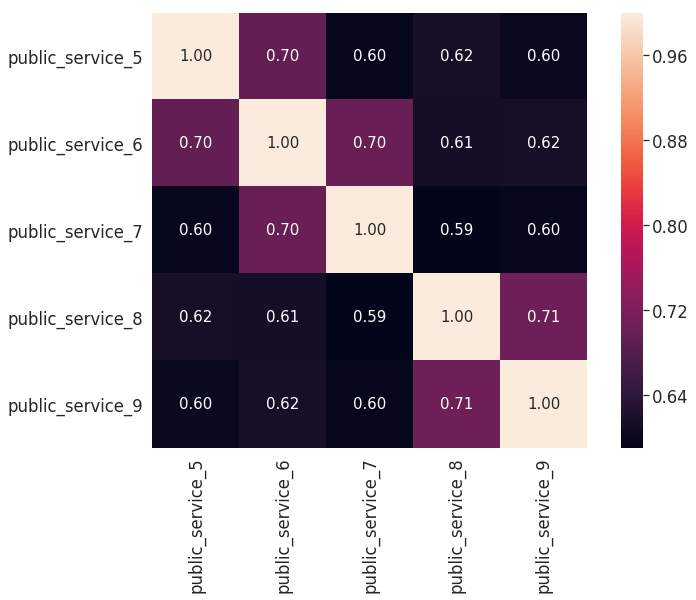

In [0]:
plt.figure(figsize=(12, 8))

cm = np.corrcoef(df_train.iloc[:, 135:140].T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=df_train.columns[135:140],xticklabels=df_train.columns[135:140])
plt.show()

# DP

In [0]:
df_train['happiness'] = df_train['happiness'].replace(-8, 3)

In [0]:
def get_missing(df):
    is_miss = df.isnull().sum().any()
    if is_miss:
        total_miss = df.isnull().sum()  # 各列的缺失数目
        percent = total_miss / len(df)
        rst = pd.concat([total_miss, percent], axis=1, keys=['total', 'percent'])
        rst['dtype'] = [str(df[col].dtypes) for col in df.columns]
        print(rst[rst['total']!=0])
    else:
        print("no miss")
 

In [0]:
get_missing(df_train)

                 total   percent    dtype
edu_other         7997  0.999625   object
edu_status        1120  0.140000  float64
edu_yr            1972  0.246500  float64
join_party        7176  0.897000  float64
property_other    7934  0.991750   object
hukou_loc            4  0.000500  float64
social_neighbor    796  0.099500  float64
social_friend      796  0.099500  float64
work_status       5049  0.631125  float64
work_yr           5049  0.631125  float64
work_type         5049  0.631125  float64
work_manage       5049  0.631125  float64
family_income        1  0.000125  float64
invest_other      7971  0.996375   object
minor_child       1066  0.133250  float64
marital_1st        828  0.103500  float64
s_birth           1718  0.214750  float64
marital_now       1770  0.221250  float64
s_edu             1718  0.214750  float64
s_political       1718  0.214750  float64
s_hukou           1718  0.214750  float64
s_income          1718  0.214750  float64
s_work_exper      1718  0.214750  

In [0]:
get_missing(df_test)

                 total   percent    dtype
edu_other         2965  0.998989   object
edu_status         449  0.151280  float64
edu_yr             784  0.264151  float64
join_party        2666  0.898248  float64
property_other    2945  0.992251   object
social_neighbor    301  0.101415  float64
social_friend      301  0.101415  float64
work_status       1890  0.636792  float64
work_yr           1890  0.636792  float64
work_type         1889  0.636456  float64
work_manage       1889  0.636456  float64
invest_other      2952  0.994609   object
minor_child        382  0.128706  float64
marital_1st        301  0.101415  float64
s_birth            649  0.218666  float64
marital_now        677  0.228100  float64
s_edu              649  0.218666  float64
s_political        649  0.218666  float64
s_hukou            649  0.218666  float64
s_income           649  0.218666  float64
s_work_exper       649  0.218666  float64
s_work_status     2009  0.676887  float64
s_work_type       2009  0.676887  

In [0]:
def fill_data(df):
    df['hukou_loc'] = df['hukou_loc'].fillna(4)
    df['family_income'] = df['family_income'].fillna(df['family_income'].mean())
    df.fillna(0, inplace=True)  # 其余使用0填充

In [0]:
fill_data(df_train)
fill_data(df_test)

In [0]:
get_missing(df_train)
get_missing(df_test)

no miss
no miss


In [0]:
def generator_attribute(df):
    df['survey_time'] = df['survey_time'].dt.year
    df['age'] = df['survey_time'] - df['birth']
generator_attribute(df_train)
generator_attribute(df_test)

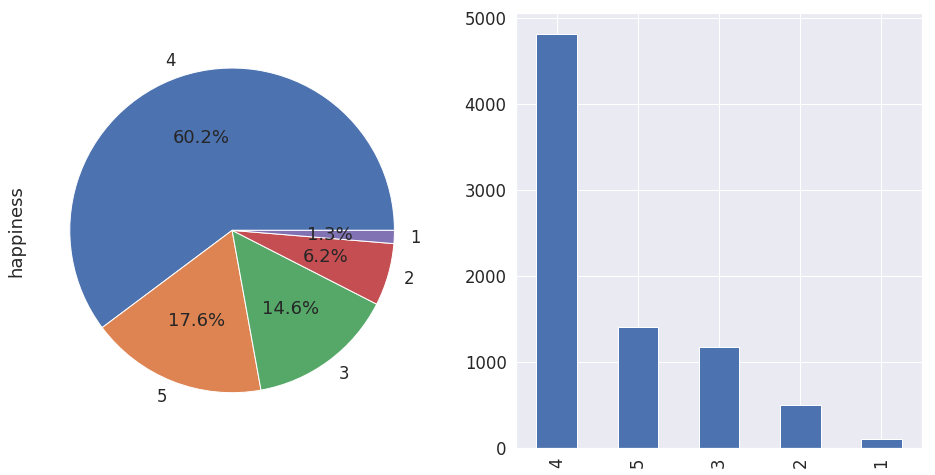

In [0]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
df_train['happiness'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.subplot(1, 2, 2)
df_train['happiness'].value_counts().plot(kind='bar')
plt.savefig('happiness_distribution.png')

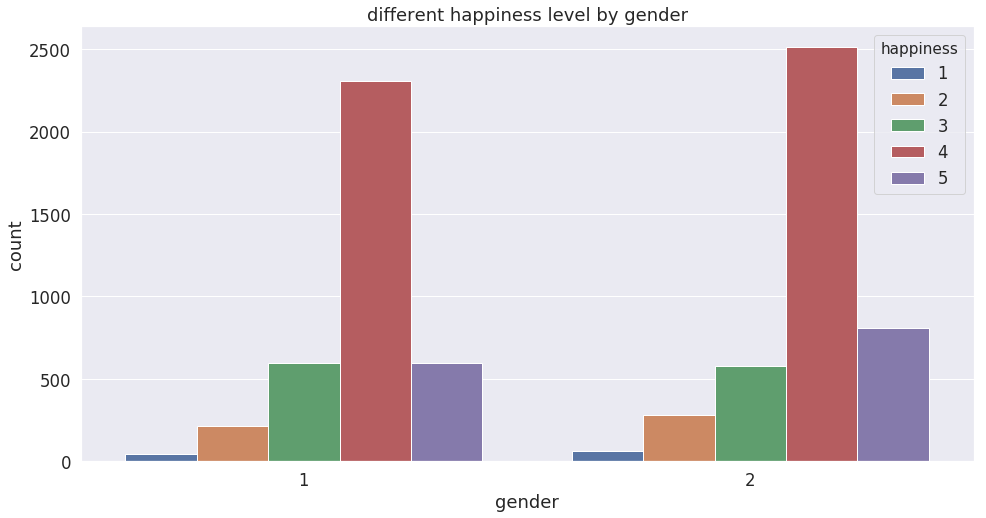

In [0]:
plt.figure(figsize=(16, 8))
sns.countplot(data=df_train, x='gender', hue='happiness')
plt.title('different happiness level by gender')
plt.savefig('gender_bar.png')

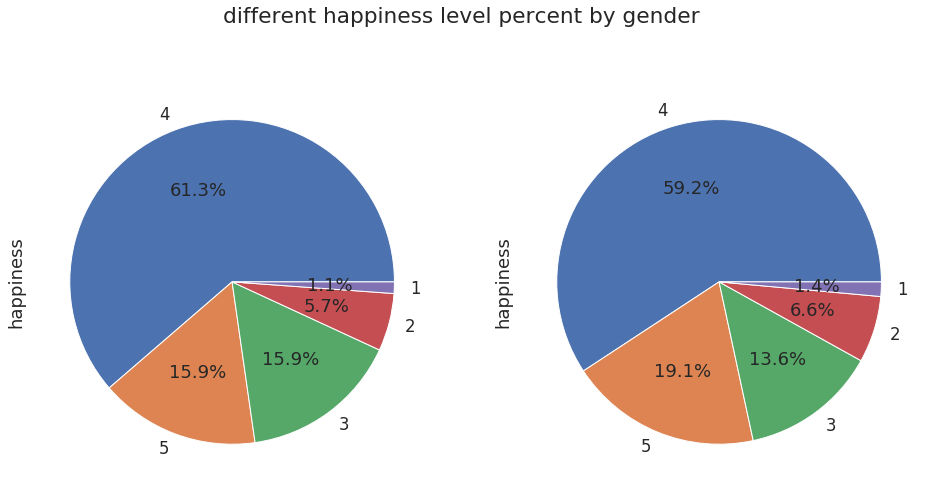

In [0]:
fig = plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
df_train['happiness'][df_train['gender'] == 1].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.subplot(1, 2, 2)
df_train['happiness'][df_train['gender'] == 2].value_counts().plot(kind='pie', autopct='%1.1f%%')
fig.suptitle('different happiness level percent by gender')
plt.savefig('gender_pie.png')

# Model

In [0]:
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from keras.utils import to_categorical

In [0]:
x_train = df_train.drop(columns=['happiness', 'id', 'survey_time', 'edu_other', 'invest_other', 'property_other']).values  # 删除几个字符串补充字段，没什么意义
y_train = df_train['happiness'].values
x_test = df_test.drop(columns=['id', 'survey_time', 'edu_other', 'invest_other', 'property_other']).values

In [0]:
from sklearn.preprocessing import MinMaxScaler
def scale_data(x_trian, x_test):
    for i in range(x_train.shape[1]):
        scaler = MinMaxScaler()
        scaler.fit(x_train[:, i].reshape(-1, 1))
        x_train[:, i] = scaler.transform(x_train[:, i].reshape(-1, 1)).reshape(-1)
        x_test[:, i] = scaler.transform(x_test[:, i].reshape(-1, 1)).reshape(-1)
    return x_train, y_train
x_train, y_train = scale_data(x_train, x_test)
        

In [0]:
pca = PCA(n_components=100)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)
# y_train = to_categorical(y_train, num_classes=5).reshape(y_train.shape[0], -1)

In [0]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=2019)

In [279]:
print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape)

(6400, 100) (1600, 100) (6400,) (1600,)


In [0]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout, BatchNormalization

In [0]:
def build_model(input_shape=(100, ), n_classes=5):
    input_tensor = Input(shape=input_shape)
    x = Dense(128, activation='relu')(input_tensor)
    x = BatchNormalization()(x)
    x = Dense(64, activation='relu')(input_tensor)
    x = Dropout(0.5)(x)
    x = Dense(1, activation=None)(x)
    model = Model(input_tensor, x)
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [0]:
model = build_model()

In [295]:
model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=100, batch_size=64)

Train on 6400 samples, validate on 1600 samples
Epoch 1/100
6400/6400 [==============================] - 3s 450us/step - loss: 8.8916 - val_loss: 4.0388
Epoch 2/100
6400/6400 [==============================] - 0s 32us/step - loss: 2.3260 - val_loss: 0.7803
Epoch 3/100
6400/6400 [==============================] - 0s 33us/step - loss: 1.3027 - val_loss: 0.5904
Epoch 4/100
6400/6400 [==============================] - 0s 33us/step - loss: 1.2142 - val_loss: 0.5679
Epoch 5/100
6400/6400 [==============================] - 0s 32us/step - loss: 1.1983 - val_loss: 0.5519
Epoch 6/100
6400/6400 [==============================] - 0s 33us/step - loss: 1.1563 - val_loss: 0.5493
Epoch 7/100
6400/6400 [==============================] - 0s 33us/step - loss: 1.1160 - val_loss: 0.5326
Epoch 8/100
6400/6400 [==============================] - 0s 32us/step - loss: 1.1057 - val_loss: 0.5256
Epoch 9/100
6400/6400 [==============================] - 0s 33us/step - loss: 1.0394 - val_loss: 0.5398
Epoch 10/100
64

In [0]:
pred = model.predict(x_valid)

In [297]:
print(mean_squared_error(y_valid, pred))

0.4840033330646969


In [0]:
pred = model.predict(x_test)
submit = pd.read_csv('../data/happiness_submit.csv')
submit['happiness'] = pred
submit.to_csv('submit.csv', encoding='utf-8', index=False)